In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.api import OLS, add_constant

from sklearn.impute import KNNImputer, SimpleImputer

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, PowerTransformer

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB, CategoricalNB

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef

Postures = pd.read_csv("Postures.csv")

# 1) Processing the Data Set

In [2]:
# Eliminate first instance of Postures (all 0's) 
df = Postures.iloc[1:]

for col in df.columns:
    proportion = (df[col] == '?').mean()*100
    if proportion > 0:
        print(f'Proportion of missing values in column {col}: {round(proportion,2)}%')

Proportion of missing values in column X3: 0.88%
Proportion of missing values in column Y3: 0.88%
Proportion of missing values in column Z3: 0.88%
Proportion of missing values in column X4: 4.0%
Proportion of missing values in column Y4: 4.0%
Proportion of missing values in column Z4: 4.0%
Proportion of missing values in column X5: 16.68%
Proportion of missing values in column Y5: 16.68%
Proportion of missing values in column Z5: 16.68%
Proportion of missing values in column X6: 33.1%
Proportion of missing values in column Y6: 33.1%
Proportion of missing values in column Z6: 33.1%
Proportion of missing values in column X7: 50.13%
Proportion of missing values in column Y7: 50.13%
Proportion of missing values in column Z7: 50.13%
Proportion of missing values in column X8: 60.86%
Proportion of missing values in column Y8: 60.86%
Proportion of missing values in column Z8: 60.86%
Proportion of missing values in column X9: 69.31%
Proportion of missing values in column Y9: 69.31%
Proportion o

In [3]:
#removing the variables with a proportion of missing values more than 80% 
for col in df.columns:
    proportion = (df[col] == '?').mean()*100
    if proportion > 80:
        df=df.drop(col, axis=1)
        
# Replace all '?' to NaN, so that the values are valid for Imputation
for col in df.columns:
    df.loc[df[col] == '?', col] = np.nan
        
X= df.drop(columns =[ 'Class' ]) 
y=df['Class']      

In [4]:
# Divide the whole Set into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

In [6]:
# Instatiate a Simple Imputater
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    
# Acquire a new DataFrame with Imputated Values
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test  = imputer.transform(X_test)

In [7]:
# Scaling the data
scaler   = PowerTransformer()
scaler.fit(X_train)
Xt_train = scaler.transform(X_train)
Xt_test  = scaler.transform(X_test)

# 2) Tree Based Models

In [8]:
# Create a Decision Tree Model with the data
tree_mdl = DecisionTreeClassifier()
tree_mdl.fit(Xt_train, y_train)
preds = tree_mdl.predict(Xt_test)

# Present the results
print("The Precision is: %7.4f" % precision_score(y_test, preds,average='micro'))
print("The Recall is: %7.4f"    % recall_score(y_test, preds,average='micro'))
print("The F1 score is: %7.4f"  % f1_score(y_test, preds,average='micro'))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_test, preds))
print()
print("This is the Confusion Matrix")
pd.DataFrame(confusion_matrix(y_test, preds))

# Maybe should try with different Hyperparameters (split, leaf, criterion, depth, etc.)
# Look into 'TP03' for better data evaluation and ideas

The Precision is:  0.9616
The Recall is:  0.9616
The F1 score is:  0.9616
The Matthews correlation coefficient is:  0.9520

This is the Confusion Matrix


,0,1,2,3,4
0,4046,5,13,2,6
1,9,3506,14,24,159
2,28,11,3995,60,21
3,11,32,85,3537,39
4,4,149,23,54,3691


# 3) Linear Models

In [9]:
# Create a Linear Regression Model with the data
reg = LinearRegression().fit(Xt_train, y_train)

# Present the Biases
print("The bias is: ",  reg.intercept_)
print("The other parameters are: ")
for i, beta in enumerate(reg.coef_):
    print("\t B%d -> %9.3f"% (i+1, beta))

The bias is:  2.983660856055044
The other parameters are: 
	 B1 ->     0.019
	 B2 ->     0.179
	 B3 ->     0.149
	 B4 ->     0.076
	 B5 ->     0.096
	 B6 ->     0.186
	 B7 ->     0.055
	 B8 ->     0.053
	 B9 ->     0.205
	 B10 ->     0.020
	 B11 ->     0.052
	 B12 ->     0.221
	 B13 ->    -0.031
	 B14 ->     0.052
	 B15 ->     0.234
	 B16 ->    -0.083
	 B17 ->     0.003
	 B18 ->     0.230
	 B19 ->    -0.176
	 B20 ->    -0.048
	 B21 ->     0.236
	 B22 ->    -0.300
	 B23 ->    -0.105
	 B24 ->     0.182
	 B25 ->    -0.273
	 B26 ->    -0.059
	 B27 ->     0.235
	 B28 ->    -0.180
	 B29 ->    -0.008
	 B30 ->     0.256
	 B31 ->    -0.125


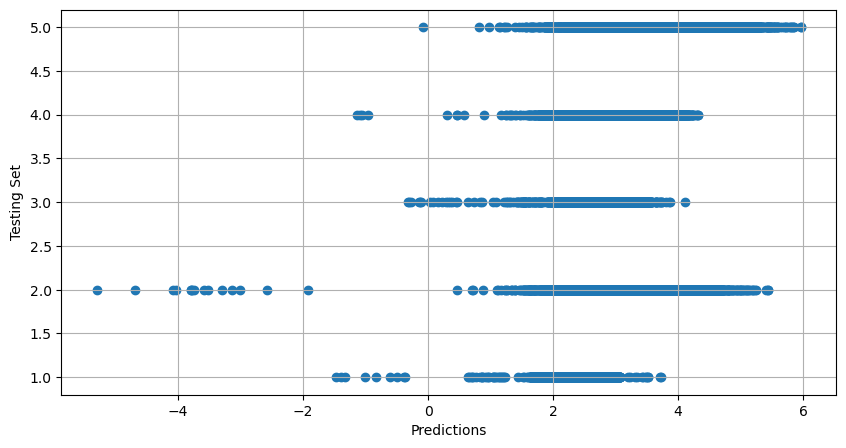

In [10]:
# Plot the Results
preds=reg.predict(Xt_test)
plt.figure(figsize=(10,5))
plt.scatter(preds, y_test)
plt.xlabel('Predictions')
plt.ylabel('Testing Set')
plt.grid()
plt.show()

In [11]:
X_tr = add_constant(Xt_train)
mdl=OLS(y_train,X_tr, hasconst=12).fit()
mdl.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     704.6
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:57:53   Log-Likelihood:                -94420.
No. Observations:               58571   AIC:                         1.889e+05
Df Residuals:                   58539   BIC:                         1.892e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9837      0.005    595.114      0.000       2.974       2.993
x1             0.0192      0.005      3.595      0.000       0.009       0.030
x2             0.1791      0.006     32.186      0.000       0.168       0.190
x3             0.1491      0.006     24.069      0.000       0.137       0.161
x4             0.0756      0.007     10.195      0.000       0.061       0.090
x5             0.0964      0.006     17.130      0.000       0.085       0.107
x6             0.1863      0.006     29.529      0.000       0.174       0.199
x7             0.0551      0.008      7.020      0.000       0.040       0.070
x8             0.0528      0.006      9.275      0.000       0.042       0.064
x9             0.2046      0.006     31.675      0.000       0.192       0.217
x10            0.0198      0.008      2.455      0.014       0.004       0.036
x11            0.0521      0.006      9.042      0.000       0.041       0.063
x12            0.2208      0.007     33.180      0.000       0.208       0.234
x13           -0.0309      0.008     -3.759      0.000      -0.047      -0.015
x14            0.0518      0.006      9.021      0.000       0.041       0.063
x15            0.2336      0.007     34.640      0.000       0.220       0.247
x16           -0.0826      0.008    -10.284      0.000      -0.098      -0.067
x17            0.0032      0.006      0.567      0.571      -0.008       0.014
x18            0.2296      0.007     33.537      0.000       0.216       0.243
x19           -0.1758      0.008    -23.129      0.000      -0.191      -0.161
x20           -0.0481      0.006     -8.620      0.000      -0.059      -0.037
x21            0.2365      0.007     34.988      0.000       0.223       0.250
x22           -0.2995      0.007    -41.807      0.000      -0.314      -0.285
x23           -0.1055      0.006    -18.720      0.000      -0.117      -0.094
x24            0.1825      0.006     29.593      0.000       0.170       0.195
x25           -0.2728      0.006    -42.712      0.000      -0.285      -0.260
x26           -0.0588      0.006    -10.108      0.000      -0.070      -0.047
x27            0.2347      0.007     36.059      0.000       0.222       0.248
x28           -0.1805      0.007    -27.321      0.000      -0.193      -0.168
x29           -0.0078      0.006     -1.310      0.190      -0.020       0.004
x30            0.2556      0.007     38.586      0.000       0.243       0.269
x31           -0.1249      0.006    -19.875      0.000      -0.137      -0.113
==============================================================================
Omnibus:                     1492.045   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              779.935
Skew:                           0.072   Prob(JB):                    4.36e-170
Ku

In [ ]:
# To Do: The same for Lasso, Ridge aand Logistic Regression

# 4) Naive Bayes

In [12]:
#Column Names (a.k.a Possible Classes)
classes = np.array(['Class 1','Class 2','Class 3','Class 4','Class 5'])

# Create a Gaussian Naive Bayes Model with the scaled data
gnb=GaussianNB()
gnb.fit(Xt_train, y_train)

# Present the Results
preds=gnb.predict(Xt_test)
print("The Accuracy score is: ", accuracy_score(y_test, preds))
print()
print('Confusion Matrix:')
display(pd.DataFrame(confusion_matrix(y_test, preds), columns=classes, index=classes))


# Create a Categorical Naive Bayes Model with the scaled data
cnb=CategoricalNB()
cnb.fit(Xt_train,y_train)

# Present the Results
preds=cnb.predict(Xt_test)
print("The Accuracy score is: ", accuracy_score(y_test, preds))
print()
print('Confusion Matrix:')
display(pd.DataFrame(confusion_matrix(y_test, preds), columns=classes, index=classes))

The Accuracy score is:  0.5122413439868879

Confusion Matrix:


,Class 1,Class 2,Class 3,Class 4,Class 5
Class 1,0,9,4063,0,0
Class 2,0,3143,98,80,391
Class 3,0,3,4094,18,0
Class 4,0,68,3158,409,69
Class 5,0,550,550,466,2355


ValueError: Negative values in data passed to CategoricalNB (input X)

# 5) K-Nearest Neighbours

In [13]:
# Scale the data so it can be used in K-Nearest Neighbours Models
# scaler = StandardScaler() #Maybe use different Scalers (See info in TP06)
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xt_train, y_train)

preds = knn.predict(Xt_test)

# Present the Results
accuracy = accuracy_score(y_test, preds)
print("Accuracy:", accuracy)

#Sholud try to make plots 

Accuracy: 0.9469883220651506
